# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
%matplotlib widget

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
combined_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
unique_mice_id = combined_data['Mouse ID'].unique()
# print(unique_mice_id)
mice_count = len(unique_mice_id)
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.duplicated(["Mouse ID", "Timepoint"]) #boolean array
combined_data.loc[combined_data.duplicated(["Mouse ID", "Timepoint"])]['Mouse ID'].unique()


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
# clean_data

In [7]:
# Checking the number of mice in the clean DataFrame.
count = len(clean_data['Mouse ID'].unique())
count

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_groupby = clean_data.groupby(['Drug Regimen'])
drug_regimen_groupby_mean = drug_regimen_groupby['Tumor Volume (mm3)'].mean()
drug_regimen_groupby_median = drug_regimen_groupby['Tumor Volume (mm3)'].median()
drug_regimen_groupby_var = drug_regimen_groupby['Tumor Volume (mm3)'].var()
drug_regimen_groupby_std = drug_regimen_groupby['Tumor Volume (mm3)'].std()
drug_regimen_groupby_sem = drug_regimen_groupby['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame((
    {
     "Mean Tumor Volume": drug_regimen_groupby_mean,
     "Median Tumor Volume": drug_regimen_groupby_median,
     "Tumor Volume Variance": drug_regimen_groupby_var,
     "Tumor Volume Std. Dev.": drug_regimen_groupby_std,
     "Tumor Volume Std. Err." : drug_regimen_groupby_sem,
    })
)
summary_df

# drug_regimen_tumor_vol_mean = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
# drug_regimen_tumor_vol_median = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
# drug_regimen_tumor_vol_var = clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
# drug_regimen_tumor_vol_std = clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
# drug_regimen_tumor_vol_sem = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# reference the following site: https://stackoverflow.com/questions/55388610/how-to-calculate-aggregated-summary-statistics-in-pandas-dataframe
summary_df_two = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_df_two

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar_chart_info = clean_data[['Drug Regimen','Timepoint']]
pandas_bar_chart_info = pandas_bar_chart_info.set_index("Drug Regimen")
pandas_bar_chart_info = pandas_bar_chart_info.groupby(['Drug Regimen']).count().sort_values(by=['Timepoint'], ascending=False)
pandas_bar_chart_info.plot(kind="bar", figsize=(6,3.5), ylabel="# of Observed Mouse Timepoints", legend=False, title="Numbers of Mouse treated with Differnet Drug Regimen")
plt.show()
plt.tight_layout()


In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_count = pandas_bar_chart_info.iloc[:, 0]
print(len(timepoint_count))
x_axis = np.arange(len(timepoint_count))

plt.bar(x_axis, timepoint_count, color='blue', align="center")
plt.title("Numbers of Mouse treated with Differnet Drug Regimen")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = clean_data["Sex"].value_counts()
#print(gender_data)

gender_data.plot.pie(autopct= "%1.1f%%", legend=False)
plt.title('Percentage of Male vs. Female Mouse')
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = ['Male', 'Female']

pie_sizes = clean_data["Sex"].value_counts()

plt.pie(pie_sizes, labels=pie_labels,
        autopct="%1.1f%%")
plt.title('Percentage of Male vs. Female Mouse', verticalalignment="center_baseline", loc="left")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mice_final_tumor = clean_data

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

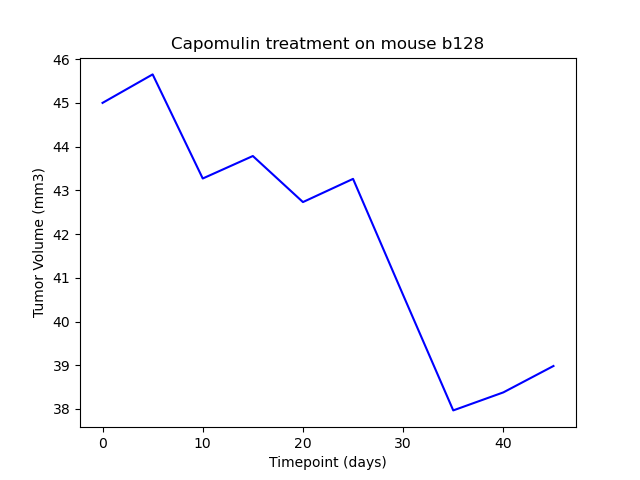

In [8]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Finding a randam mice treated with Capomulin
find_single_mice_capomulin = clean_data.groupby('Drug Regimen').min()
# print(find_single_mice_capomulin)

single_mice_capomulin = combined_data.loc[combined_data['Mouse ID'] == "b128"]
#print(single_mice_capomulin)

x_axis = np.arange(0, 50, 5)
#print(x_axis)

tumor_vol = []

test = single_mice_capomulin.iloc[0,2]
tumor = 0 

for tumor in range(10):
    store_tumor_vol = single_mice_capomulin.iloc[tumor,2]
    tumor_vol.append(store_tumor_vol)

plt.plot(x_axis, tumor_vol, color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment on mouse b128")
plt.show()

In [9]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_treated_with_capomulin = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]

test = mouse_treated_with_capomulin.groupby(['Mouse ID']).mean()
test


C:\Users\A V\AppData\Local\Temp\ipykernel_4496\2822702511.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = mouse_treated_with_capomulin.groupby(['Mouse ID']).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
